### **Decision Tree Classification**

* Decision Trees are one of the most intuitive and powerful algorithms for classification. 

* They mirror human decision-making and provide a transparent, 'white-box' approach to modeling. 

* This notebook demonstrates an end-to-end guide to the Decision Tree algorithm using the classic Iris dataset.

* We will explore the core concepts that govern how a decision tree is built, including entropy, information gain, and Gini impurity. 

* Finally, we'll demonstrate a practical implementation using Python's `scikit-learn` library.

#### **1. Core Concepts**

#### *A. The Splitting Process*
* At its core, a Decision Tree works by recursively splitting a dataset into smaller, more homogeneous subsets. 

* **Tree Structure**: The model's name comes from its tree-like structure, which consists of several key components:
    * **Root Node**: The starting point of the tree, representing the entire dataset.
    * **Internal Nodes**: Nodes that perform a 'test' on a feature (e.g., 'Is Age > 30?'). Each internal node has branches leading to different outcomes based on the test.
    * **Leaf Nodes**: The end points of the tree where the final decision or prediction is made. They do not split any further.

* **Splitting**: The process of dividing a node into two or more sub-nodes. The algorithm's main task is to find the "best" feature and threshold to split on at each node. The goal of a good split is to create child nodes that are as "pure" as possible, meaning they contain data points that predominantly belong to a single class.

* This process starts at the **root node** (representing the entire dataset) and continues by asking a series of questions about the features. 

* The goal is to create **leaf nodes** that are as 'pure' as possible, meaning they contain data points belonging to a single class.

#### *B. Gini Impurity vs. Entropy & Information Gain*
* These are the two primary metrics used to decide the best feature and split point at each node. 

* They both measure the 'impurity' or 'disorder' of a node's data. 

* The algorithm's goal is to find a split that maximizes the reduction in this impurity.

  * **Gini Impurity/Index:** Measures the probability of misclassifying a randomly chosen element in the dataset. 
    * A Gini index of 0 means the node is perfectly pure. 
    * The algorithm aims to minimize this value.

    $$
    \text{Gini} = 1 - \sum_{i=1}^{c} (P_i)^2
    $$

    Where $( P_i $) is the probability of an element being classified to a specific class.

  * **Entropy & Information Gain:** Entropy is a measure of randomness or unpredictability in a dataset. 
    * A low entropy value indicates a more predictable or homogeneous dataset. 
    * Information Gain is the reduction in entropy achieved after a split. 
    * The algorithm aims to maximize Information Gain.

    $$
    \text{Entropy} = -\sum_{i=1}^{c} P_i \log_2 P_i
    $$

    $$
    \text{Information Gain} = \text{Entropy(Parent)} - \text{Entropy(Children)}
    $$
    


![Gini Vs Entropy Comparison](gini_entropy_comparison.png)

This graph compares **Gini Impurity** and **Entropy** as measures of impurity in a binary classification node, based on the probability \( p \) of one class.

- The **x-axis** represents the probability \( p \) of one class in the node, ranging from 0 (all belong to the other class) to 1 (all belong to this class).
- The **y-axis** shows the impurity value measured by Gini or Entropy.

Key points to notice:

- Both metrics are **zero** at the extremes \( p=0 \) and \( p=1 \), meaning the node is perfectly pure (only one class).
- Both reach their **maximum impurity at \( p=0.5 \)**, where the classes are evenly mixed and the node is most uncertain.
- The **green dashed vertical line** marks \( p=0.5 \), highlighting the point of maximum uncertainty.
- The **blue dotted horizontal line** shows the Gini impurity value at \( p=0.5 \).
- The **red dotted horizontal line** shows the Entropy value at \( p=0.5 \).
- Notice that Entropy generally has higher values than Gini, meaning it is more sensitive to changes in class distribution.

This visualization helps us understand how these impurity measures behave as class probabilities change, which guides the decision tree in choosing the best splits.


### **2. Practical Implementation with the Iris Dataset**

* We will now apply the *Decision Tree* algorithm to the `Iris` dataset, a classic dataset in machine learning. 

* The dataset contains 4 features (`sepal_length`, `sepal_width`, `petal_length`, `petal_width`) and 3 classes of iris flowers (`Setosa`, `Versicolor`, `Virginica`).

#### Step 1: Setup and Data Loading

* First, we'll import the necessary libraries and load the Iris dataset, which is conveniently available within `scikit-learn`.

In [7]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

In [8]:
# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target_names[iris.target]

print("First 5 rows of the Iris dataset:")
df.head()

First 5 rows of the Iris dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Step 2: Prepare the Data

* We need to separate our features (`X`) from our target variable (`y`) and then split the data into training and testing sets. 

* This allows us to train the model on one portion of the data and evaluate its performance on a new, unseen portion.

In [9]:
# Define features (X) and target (y)
X = df.drop('species', axis=1)
y = df['species']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (120, 4)
Testing set shape: (30, 4)


#### Step 3: Train the Decision Tree Classifier

* We will now instantiate and train a `DecisionTreeClassifier`. 

* We can specify the splitting criterion (`criterion='gini'` or `criterion='entropy'`) and other hyperparameters like `max_depth` to control the complexity of the tree.

In [10]:
# Initialize the classifier with the Gini index as the criterion
dt_classifier = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)

# Train the model on the training data
dt_classifier.fit(X_train, y_train)

print("Decision Tree Classifier trained successfully using Gini Index.")

Decision Tree Classifier trained successfully using Gini Index.


#### Step 4: Make Predictions and Evaluate the Model

* After training, we will use our model to make predictions on the test set and evaluate its performance.

* A common metric is `accuracy_score`, and the `classification_report` provides more detailed insights into precision, recall, and F1-score for each class.

In [11]:
# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

In [12]:
# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 1.0000


In [13]:
# Print a detailed classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



#### Step 5: Visualize the Decision Tree

* The true power of Decision Trees lies in their interpretability. 

* We can visualize the tree to see the exact sequence of rules that the model learned to make its predictions. 

* Each node shows the splitting criterion and the resulting class distribution.

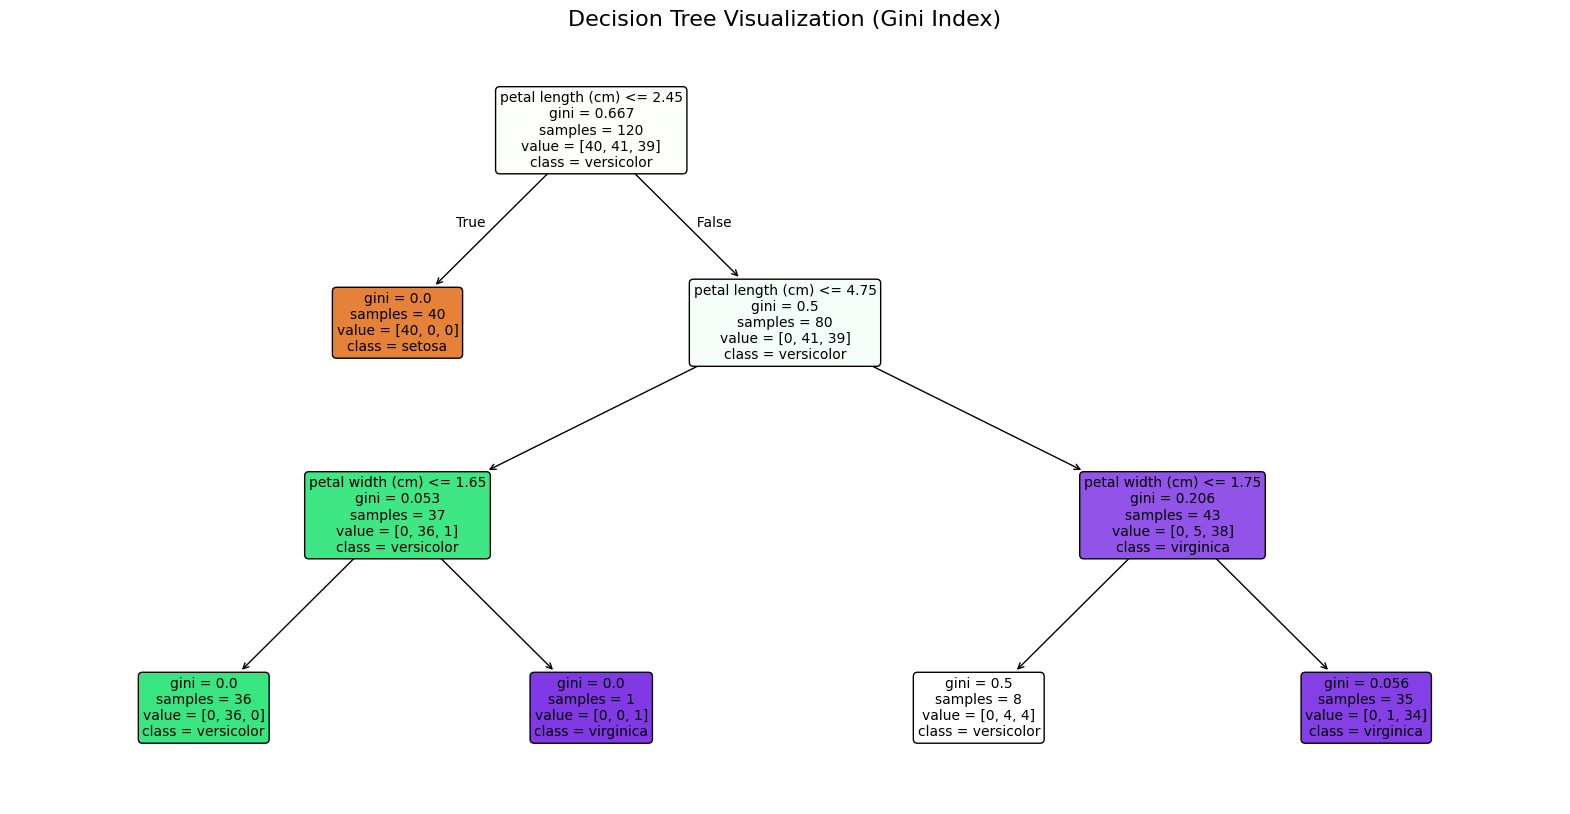

In [14]:
plt.figure(figsize=(20,10))
plot_tree(dt_classifier,
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree Visualization (Gini Index)", fontsize=16)
plt.show()

--- 
### **Summary**

* This notebook has provided an end-to-end demonstration of the Decision Tree Classifier. 

* You've learned the fundamental concepts of Gini impurity and entropy, implemented the algorithm on the Iris dataset, and visualized the resulting tree. 

* This combination of strong performance and easy interpretability makes Decision Trees a powerful tool in any data scientist's arsenal.

---

#### **Exercise - Decision Tree Classifier for Credit Risk Prediction**

#### Problem Statement

* Develop a Machine Learning Classification Model that can assess the credit risk of loan applicants. 

* The goal is to predict whether an applicant is **'High Risk'** (1) or **'Low Risk'** (0) based on their financial and personal information. 

* You will use a **Decision Tree** model for this task because its transparent, flowchart-like structure makes it easy to explain the reasons behind a loan approval or denial to stakeholders and regulators.

#### Necessary Steps to be Performed 

1.  **Import Libraries, Load and Explore the Dataset**: Import the necessary libraries, Load and Expore the dataset for credit risk analysis.
2.  **Data Preprocessing**: Prepare the data for the model by converting categorical features into a numerical format.
3.  **Define Features and Target**: Separate the dataset into feature variables (`X`) and the target variable (`y`).
4.  **Split Data**: Divide the data into a training set and a testing set.
5.  **Create and Train Model**: Instantiate a `DecisionTreeClassifier` and train it on the training data.
6.  **Evaluate Model Performance**: Test the model's accuracy on the unseen data.
7.  **Visualize the Decision Tree**: Plot the trained model to understand its decision-making logic.
8.  **Make Predictions**: Use the model to predict the credit risk for a new applicant.

---


* Donwload Dataset:  [credit_risk.csv](https://raw.githubusercontent.com/prakash-ukhalkar/ML/refs/heads/main/08_Decision_Tree_Classification_ML/01_Exercise_Decision_Tree_Classification_ML/credit_risk.csv)
* Solution : [Exercise - Decision Tree Classifier for Credit Risk Prediction](https://github.com/prakash-ukhalkar/ML/blob/main/08_Decision_Tree_Classification_ML/01_Exercise_Decision_Tree_Classification_ML/01_Exercise_Decision_Tree_Classification_ML.ipynb)

---